## Import the things

In [2]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline

In [34]:
with open('data/combined_men_group.pickle','rb') as read_file:
    combined_men_group = pickle.load(read_file)

In [35]:
with open('data/combined_women_group.pickle','rb') as read_file:
    combined_women_group = pickle.load(read_file)

In [36]:
with open('data/df_common_food.pickle', 'rb') as read_file:
    common_food = pickle.load(read_file)

# First Round: Food Groups

This is a first stab at this model with foods grouped by the classification in the common_food file. This should
create less features than foods alone, but I'm still concerned there are too many features

### Exploration

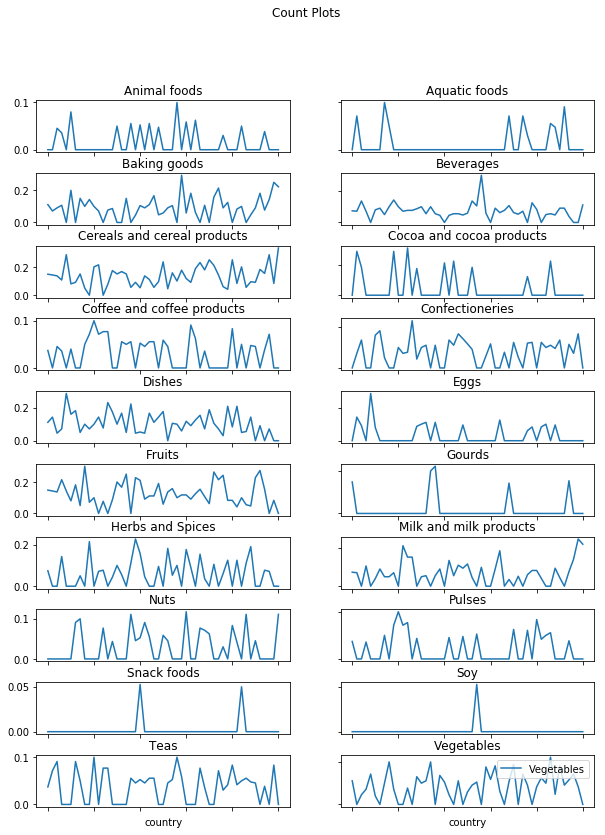

In [28]:
num_rows = len(X.columns)/2

fig, axs = plt.subplots(figsize = (10,13),
                       nrows = int(num_rows), ncols = 2,
                       gridspec_kw=dict(hspace=0.4)) # Much control of gridspec)
fig.suptitle('Count Plots')

targets = zip(X.columns, axs.flatten())
for i, (col,ax) in enumerate(targets):
    X[col].plot(ax = ax)
    ax.set_title(col)
    
for ax in axs.flat:
    ax.label_outer()
    
ax.legend()
plt.show()



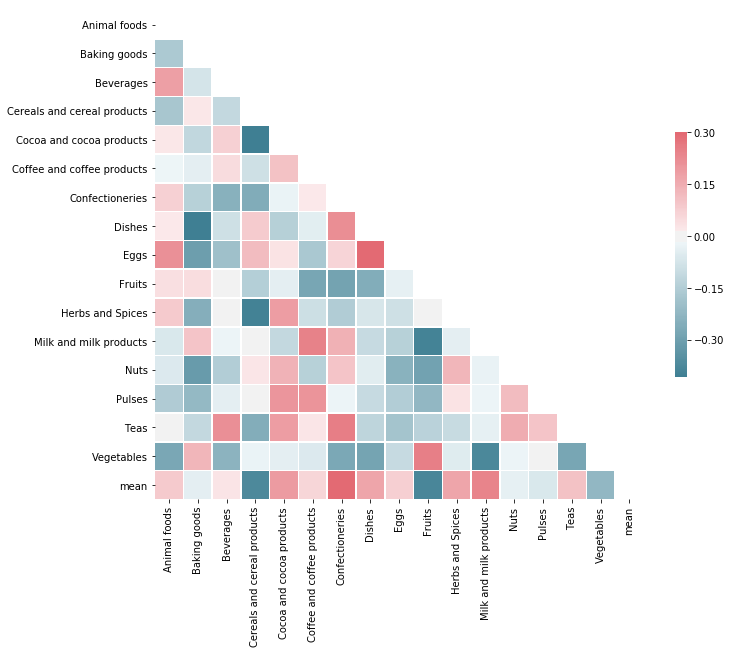

In [42]:
corr = X.join(y, how = 'left').corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Setting up the Model

In [43]:
X = combined_men_group[['food', 'group']]

In [28]:
X = X.pivot(columns = 'group', values = 'food')

In [47]:
# Note: there are still a lot of food groups with zero...this is a reason to fill out dataset
X = X.replace(np.nan,0)

In [48]:
y = combined_men_group.groupby('country')['mean'].mean()

### Modeling

In [62]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression  

In [20]:
linreg_model = LinearRegression()
linreg_model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [63]:
import statsmodels.api as sm

**1st Run**

Number of Features: **20**

Number of y's: **51**

*Improvements* - Eliminate food groups with small number of occurances

In [22]:
height_model = sm.OLS(y, X)

results = height_model.fit()

# summarize our model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   mean   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     1.837
Date:                Mon, 07 Oct 2019   Prob (F-statistic):             0.0643
Time:                        16:23:38   Log-Likelihood:                -138.37
No. Observations:                  51   AIC:                             316.7
Df Residuals:                      31   BIC:                             355.4
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Animal foods                  188.4542     31.555      5.972      0.000     124.098     252.810
Aquatic foods                 188.2992     29.120      6.466      0.000     128.910     247.689
Baking goods                  174.6822     10.988     15.897      0.000     152.272     197.093
Beverages                     175.2696     16.134     10.864      0.000     142.365     208.175
Cereals and cereal products   160.6625     10.404     15.442      0.000     139.443     181.882
Cocoa and cocoa products      221.0802     36.284      6.093      0.000     147.078     295.083
Coffee and coffee products    167.0532     26.321      6.347      0.000     113.371     220.735
Confectioneries               206.4762     13.190     15.654      0.000     179.574     233.378
Dishes                        173.5143     12.711     13.650      0.000     147.589     199.440
Eggs                          177.5852     33.991      5.224      0.000     108.260     246.911
Fruits                        148.0327      9.254     15.996      0.000     129.158     166.907
Gourds                        220.5368     54.789      4.025      0.000     108.793     332.281
Herbs and Spices              186.8460     10.734     17.407      0.000     164.954     208.738
Milk and milk products        180.2248     12.378     14.560      0.000     154.979     205.471
Nuts                          147.2326     22.049      6.677      0.000     102.263     192.203
Pulses                        152.1042     25.645      5.931      0.000      99.800     204.408
Snack foods                    57.4265     81.371      0.706      0.486    -108.531     223.384
Soy                           209.6514     49.353      4.248      0.000     108.995     310.308
Teas                          166.1300     24.157      6.877      0.000     116.862     215.398
Vegetables                    174.0670     11.891     14.638      0.000     149.815     198.319
==============================================================================
Omnibus:                        3.909   Durbin-Watson:                   2.132
Prob(Omnibus):                  0.142   Jarque-Bera (JB):                3.434
Skew:                          -0.635   Prob(JB):                        0.180
Kurtosis:                       2.970   Cond. No.                         37.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**2nd Run**

Number of Features: **16**

Number of y's: **51**

*Improvements* - I don't believe this model. I think it's overfitting the data, because there are few occurances
of y with a high number of features. I'm going to work on further grouping the foods down

In [43]:
height_model = sm.OLS(y, X)

results = height_model.fit()

# summarize our model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   mean   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1521.
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           7.24e-45
Time:                        17:07:51   Log-Likelihood:                -167.97
No. Observations:                  51   AIC:                             367.9
Df Residuals:                      35   BIC:                             398.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Animal foods                  167.7027     48.505      3.457      0.001      69.233     266.173
Baking goods                  197.2578     17.689     11.152      0.000     161.348     233.168
Beverages                     183.5543     25.372      7.234      0.000     132.046     235.063
Cereals and cereal products   151.2414     17.184      8.801      0.000     116.356     186.127
Cocoa and cocoa products      193.8487     58.945      3.289      0.002      74.183     313.514
Coffee and coffee products    152.9416     40.009      3.823      0.001      71.720     234.164
Confectioneries               175.0135     21.022      8.325      0.000     132.337     217.689
Dishes                        183.3186     20.980      8.738      0.000     140.727     225.911
Eggs                          204.8056     56.114      3.650      0.001      90.889     318.722
Fruits                        160.0952     15.292     10.469      0.000     129.050     191.140
Herbs and Spices              178.5635     17.763     10.052      0.000     142.502     214.625
Milk and milk products        167.1199     20.009      8.352      0.000     126.500     207.740
Nuts                          184.7482     35.162      5.254      0.000     113.365     256.131
Pulses                        175.3021     41.993      4.175      0.000      90.052     260.552
Teas                          205.5424     38.572      5.329      0.000     127.237     283.848
Vegetables                    184.4818     19.876      9.282      0.000     144.131     224.832
==============================================================================
Omnibus:                        3.134   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.209   Jarque-Bera (JB):                1.821
Skew:                           0.196   Prob(JB):                        0.402
Kurtosis:                       2.161   Cond. No.                         19.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Second Round: Basic Food Groups

I did some research on the main food groups and paired down the foods to these categories. Even so there are some groups which don't show up in certain countries. I may just need to scrape more to expand this dataset if this doesn't turn out a great result. I've gotten the features down to 7 from 16, though. Legumes are a confusing food group. I may still want to include those in something

### Transposing Dataset and Casting back to Pickle

In [75]:
#transpose_men = combined_men_group[['food', 'group']]
transpose_women = combined_women_group[['food', 'group']]

In [77]:
#transpose_men = transpose_men.pivot(columns = 'group', values = 'food')
transpose_women = transpose_women.pivot(columns = 'group', values = 'food')

In [78]:
# Note: there are still a lot of food groups with zero...this is a reason to fill out dataset
#transpose_men = transpose_men.replace(np.nan,0)
transpose_women = transpose_women.replace(np.nan,0)

In [79]:
#y_men = combined_men_group.groupby('country')['mean'].mean()
y_women = combined_women_group.groupby('country')['mean'].mean()

In [80]:
combined_men_group = transpose_men.join(y_men, how = 'left')
combined_women_group = transpose_women.join(y_women, how = 'left')

In [81]:
with open('data/combined_men_group.pickle','wb') as to_write:
    pickle.dump(combined_men_group, to_write)

In [83]:
with open('data/combined_women_group.pickle','wb') as to_write:
    pickle.dump(combined_women_group, to_write)

### Exploration

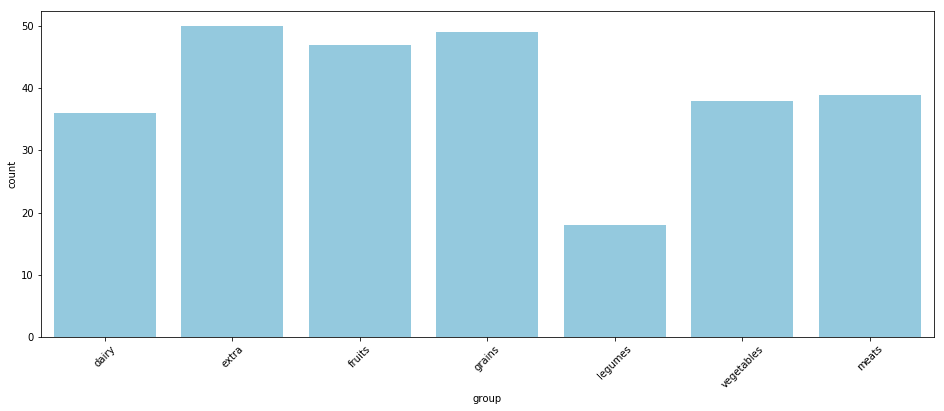

In [40]:
plt.figure(figsize=(16, 6))
chart = sns.countplot(x = combined_men_group['group'], color = 'skyblue')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

Legumes coming in low here. I think they need a home, but my best solution is to just duplicate and put them in vegetables and meats. Going to see how how run 1 comes out then return.

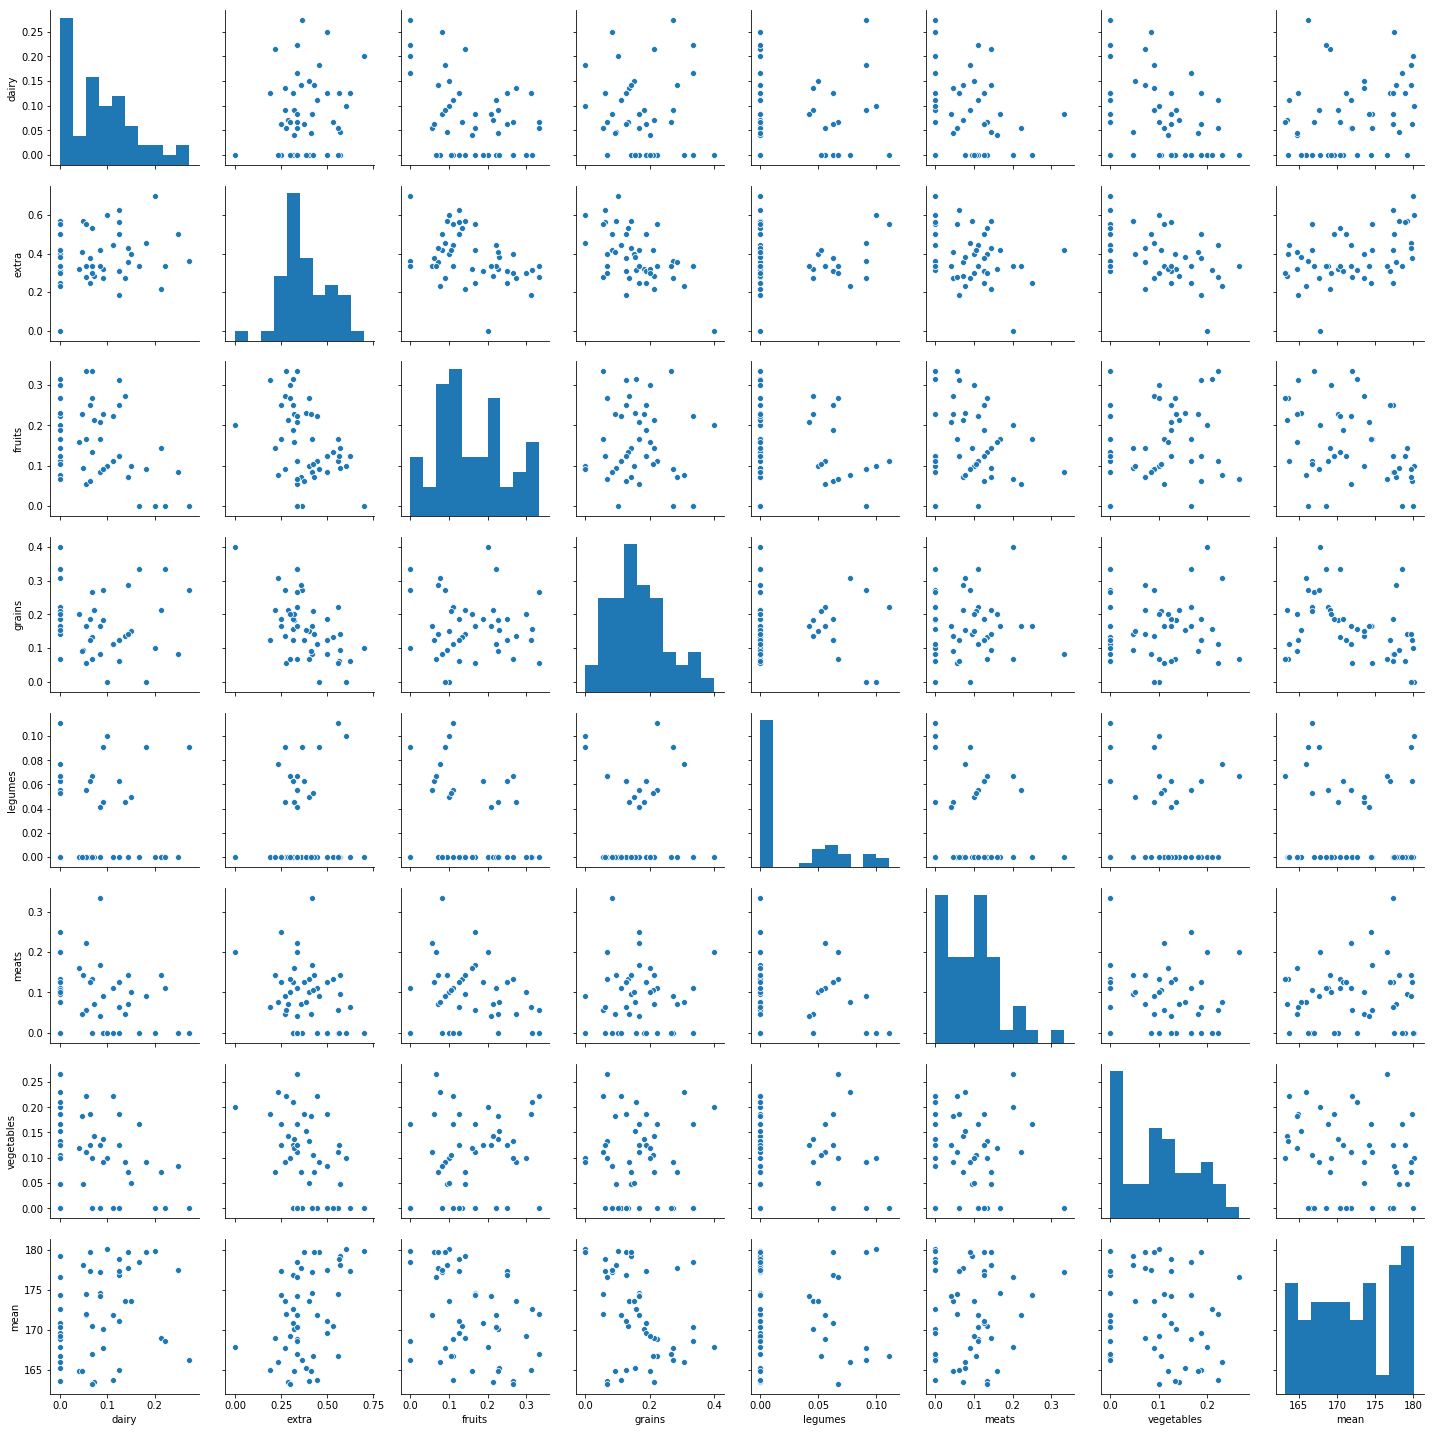

In [85]:
sns.pairplot(combined_men_group)

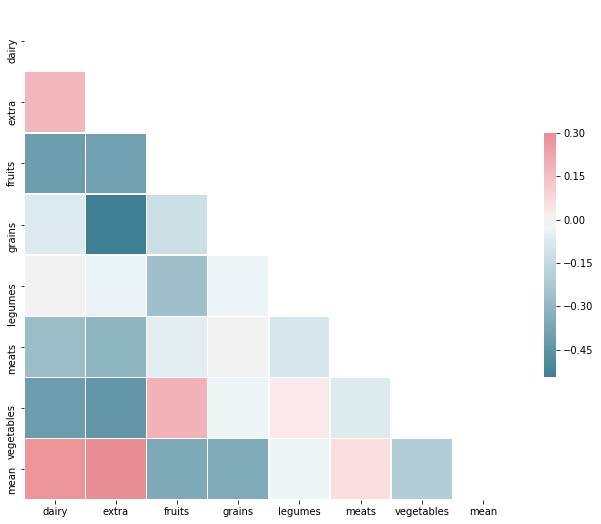

In [54]:
corr = X.join(y, how = 'left').corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

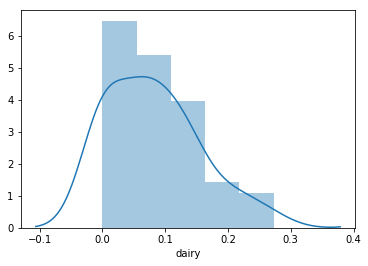

In [58]:
sns.distplot(X['dairy'])

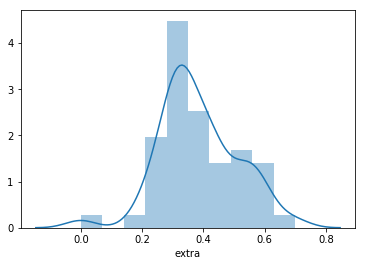

In [59]:
sns.distplot(X['extra'])

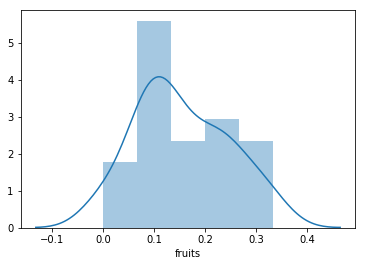

In [60]:
sns.distplot(X['fruits'])

## Setting up the Model

In [43]:
X = combined_men_group[['food', 'group']]

In [48]:
y = combined_men_group.groupby('country')['mean'].mean()

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

### Modeling

Let's try it out

**1st Run**

Number of Features: **7**

Number of y's: **51**

*Improvements from before* - Using train, test split this time around

*Improvements for the future* - 

In [66]:
linreg_model = LinearRegression()
linreg_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [67]:
height_model = sm.OLS(y_train, X_train)

results = height_model.fit()

# summarize our model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   mean   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     3.566
Date:                Tue, 08 Oct 2019   Prob (F-statistic):            0.00782
Time:                        17:59:26   Log-Likelihood:                -114.05
No. Observations:                  40   AIC:                             242.1
Df Residuals:                      33   BIC:                             253.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
dairy        182.4540     11.006     16.577      0.000     160.061     204.847
extra        182.8999      4.113     44.465      0.000     174.531     191.269
fruits       146.8342      8.248     17.803      0.000     130.054     163.614
grains       159.6506      7.114     22.443      0.000     145.178     174.123
legumes      135.7473     22.717      5.976      0.000      89.529     181.966
meats        177.3098      9.846     18.009      0.000     157.279     197.341
vegetables   179.8996     10.334     17.409      0.000     158.875     200.924
==============================================================================
Omnibus:                        4.184   Durbin-Watson:                   1.808
Prob(Omnibus):                  0.123   Jarque-Bera (JB):                1.751
Skew:                          -0.041   Prob(JB):                        0.417
Kurtosis:                       1.978   Cond. No.                         15.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

There's the much lower R^2 that I was expecting

**Figuring Out summary statistics**

F-stat - probability of f stat is fairly low it seems. Linear relationship not due to chance

Log-likelihoood - pretty high meaning our likelihood of seeing this real data is fairly high

Omnibus - looks pretty good. p > 0.05 means we can't reject null H that the error is normally distributed. 

Skew - pretty good no negative or positive skew of error

Kurtosis - peakiness. Maybe a little bit peaky, but not bad

JB - looking for skew = 0 and kurtosis ~3. Checking if conditions are close enough to normal to accept null that error is normal

p(JB) - Looking for p>0.05 to fail to reject null

Durbin-Watson - errors are uncorrelated. Value is close to 2, so seems good

Cond Number - Sensitivity of prediction to small errors in input. the condition number seems to be improving. 

**Checking Assumptions**

**Assumption 1**: Regression is linear and correctly specified

In [122]:
import patsy
import scipy.stats as stats

In [125]:
y_pred = linreg_model.predict(X_train)

In [132]:
def diagnostic_plot(x_test, y_pred, y_test):
    plt.figure(figsize=(20,5))

    # Can't really plot regression here, because the X matrix is too large
    #plt.subplot(1, 3, 1)
    #plt.scatter(x_test,y_test)
    #plt.plot(x_test, y_pred, color='blue',linewidth=1)
    #plt.title("Regression fit")
    #plt.xlabel("x")
    #plt.ylabel("y")
    
    plt.subplot(1, 2, 1)
    res = y_test - y_pred
    plt.scatter(y_pred, res)
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    
    plt.subplot(1, 2, 2)
    #Generates a probability plot of sample data against the quantiles of a 
    # specified theoretical distribution 
    stats.probplot(res, dist="norm", plot=plt)
    plt.title("Normal Q-Q plot")

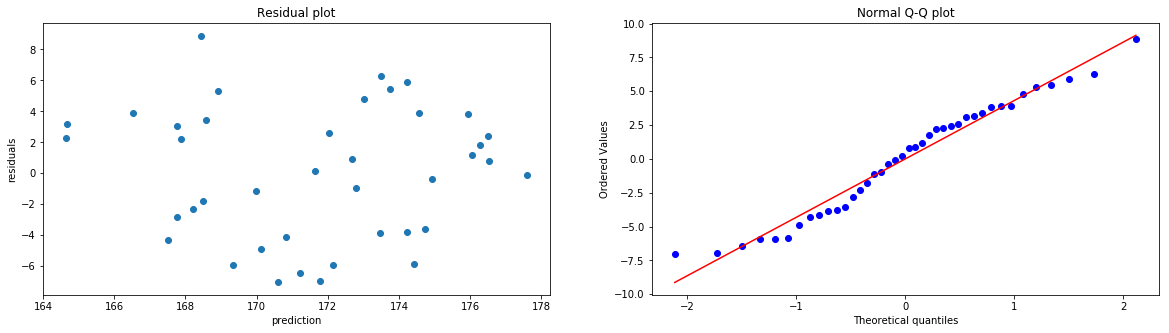

In [133]:
diagnostic_plot(X_train['grains'], y_pred, y_train)

**Assumption 2:** Residuals are normally distributed with zero mean 

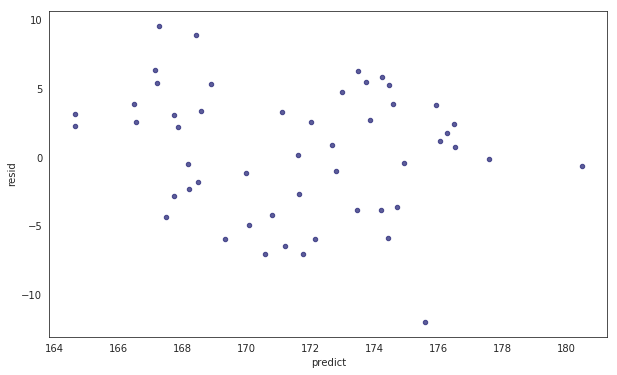

In [145]:
combined_men_group['predict']= linreg_model.predict(X)
combined_men_group['resid']=combined_men_group['mean']-combined_men_group['predict']
with sns.axes_style('white'):
    plot=combined_men_group.plot(kind='scatter',
                  x='predict',y='resid',alpha=0.7,figsize=(10,6), color =  'midnightblue')

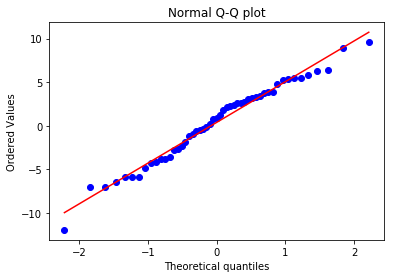

In [146]:
stats.probplot(combined_men_group['resid'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

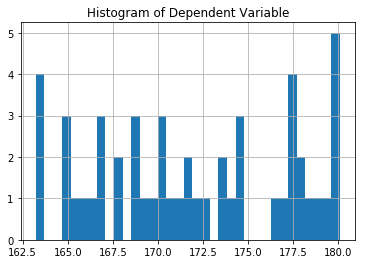

In [149]:
combined_men_group['mean'].hist(bins=35)
plt.title('Histogram of Dependent Variable');

**Assumption 3:** Error terms have constant variance

The condition number could reveal this. If the errors are not constantly varied it would be large indicating some heteroskedacicity.  

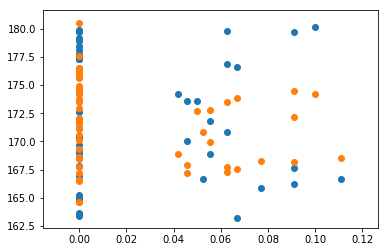

In [154]:
# quick reg plot
plt.scatter(combined_men_group['legumes'],combined_men_group['mean'])
plt.scatter(combined_men_group['legumes'],combined_men_group['predict']);

After plotting a few of these clearly legumes is the worst. I need to deal with this in a future model

I think for legumes I can fix this problem by incorporating it and eliminating the feature, but for others which may have zero values some transformations may be necessary (box cox or log)

**Assumption 4:** Errors are uncorrelated across observations

There's no time element in this model, because I"m keeping year consistent, but if this model were to be expanded upon for future years then this may come in handy. 

Actually this just gave me an idea. Incorporating the entire dataset of mean heights over the course of 100 years may be a way to get me some more y's

**Assumption 5:** No independent variable is a perfect linear function of any other independent variable (no perfect multicolinearity)

Ridge regularization can fix that, and keeping an eye on the condition number will reveal it

# Third Round: Regularization and Legume Grouping

**This Round**
I'm going to put legumes into a group then regularize my features using lasso and ridge regression. 


**Future**
I only have 51 **y's** in total due to the amount of countries I landed with after scraping. I have a couple options here. This is a problem I'll sideline for round 4, but keeping in mind.

1) Get more y's (scrape and pull in more countries)

2) Use the full 100 years of mean values

Additionally, I'm not entirely confident in the size of my **X**. Some food groups come in at zero which I don't buy. Because the ratio here is really what's most critical I would *love* to scrape more

**Combined legumes with meat group and renamed protein**

In [3]:
with open('data/combined_men_group.pickle','rb') as read_file:
    combined_men_group = pickle.load(read_file)

**Put the transposing steps in the cleaning script**

In [32]:
with open('data/combined_men_group.pickle', 'rb') as read_file:
    combined_men_group = pickle.load(read_file)

**Need to do Kfolds**

In [4]:
from sklearn.model_selection import KFoldFold

In [34]:
combined_men_group.head()

,dairy,extra,fruits,grains,protein,vegetables,mean
country,,,,,,,
Algeria,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,170.071800
Argentina,0.200000,0.200000,0.200000,0.200000,0.200000,0.000000,174.615725
Australia,0.000000,0.200000,0.200000,0.200000,0.200000,0.200000,179.204648
Brazil,0.142857,0.142857,0.142857,0.142857,0.285714,0.142857,173.551211
Cameroon,0.000000,0.000000,0.250000,0.250000,0.250000,0.250000,167.823191


In [35]:
X = combined_men_group.drop('mean', axis = 1)

In [36]:
y = combined_men_group['mean']

In [37]:
kf = KFold(n_splits=5, random_state=42, shuffle=True)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train, y_test = y[train_index], y[test_index]

**Modeling**

In [38]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression  

In [39]:
linreg_model = LinearRegression()
linreg_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [40]:
import statsmodels.api as sm

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

height_model = sm.OLS(y_train, sm.add_constant(scaler.fit_transform(X_train)))

results = height_model.fit()

# summarize our model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   mean   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.000
Date:                Wed, 09 Oct 2019   Prob (F-statistic):              0.432
Time:                        22:12:37   Log-Likelihood:                -124.10
No. Observations:                  41   AIC:                             260.2
Df Residuals:                      35   BIC:                             270.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        172.6618      0.844    204.603      0.000     170.949     174.375
x1             0.5461      0.748      0.730      0.470      -0.972       2.065
x2             1.1806      1.009      1.170      0.250      -0.868       3.229
x3            -0.5329      0.845     -0.631      0.532      -2.249       1.183
x4            -1.6094      0.902     -1.784      0.083      -3.441       0.222
x5             0.0076      0.627      0.012      0.990      -1.265       1.280
x6             0.2053      0.743      0.276      0.784      -1.303       1.714
==============================================================================
Omnibus:                        5.676   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.059   Jarque-Bera (JB):                3.052
Skew:                          -0.440   Prob(JB):                        0.217
Kurtosis:                       1.993   Cond. No.                     6.21e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.51e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Well...getting worse I suppose. Moving on to the get more data step

# Round 4: Got a bit more data and learned how to standardize

/Users/brittb28/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


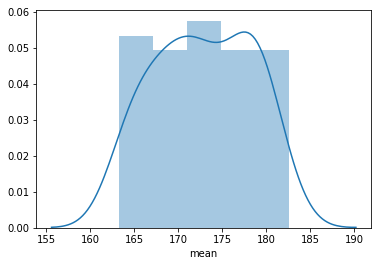

In [55]:
sns.distplot(final_df_men['mean'])

In [44]:
with open('data/final_df_men.pickle','rb') as read_file:
    final_df_men = pickle.load(read_file)

In [49]:
X = final_df_men.drop('mean', axis = 1)
y = final_df_men['mean']

In [50]:
kf = KFold(n_splits=5, random_state=42, shuffle=True)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train, y_test = y[train_index], y[test_index]

In [53]:
linreg_model = LinearRegression()
linreg_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

height_model = sm.OLS(y_train, sm.add_constant(scaler.fit_transform(X_train)))

results = height_model.fit()

# summarize our model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   mean   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     3.995
Date:                Wed, 09 Oct 2019   Prob (F-statistic):            0.00282
Time:                        23:15:24   Log-Likelihood:                -146.71
No. Observations:                  51   AIC:                             307.4
Df Residuals:                      44   BIC:                             320.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        173.2214      0.648    267.471      0.000     171.916     174.527
x1             1.6094      1.261      1.277      0.208      -0.931       4.150
x2             3.1756      1.453      2.186      0.034       0.248       6.103
x3            -3.7736      1.195     -3.158      0.003      -6.182      -1.365
x4             0.2446      1.668      0.147      0.884      -3.118       3.607
x5            -0.2384      1.530     -0.156      0.877      -3.323       2.846
x6            -0.9554      1.251     -0.763      0.449      -3.477       1.567
==============================================================================
Omnibus:                        0.692   Durbin-Watson:                   1.582
Prob(Omnibus):                  0.707   Jarque-Bera (JB):                0.803
Skew:                          -0.227   Prob(JB):                        0.669
Kurtosis:                       2.586   Cond. No.                         6.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Round 5: Transforming Features

### Transforming Features

In [57]:
from sklearn import preprocessing

In [83]:
import scipy.stats as stats

/Users/brittb28/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


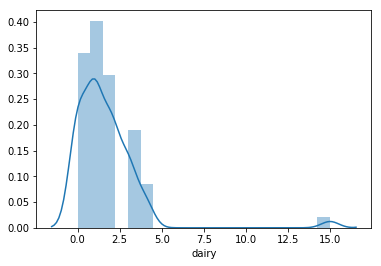

In [92]:
sns.distplot(X.dairy)

/Users/brittb28/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Lambda: 0.4767555682442823


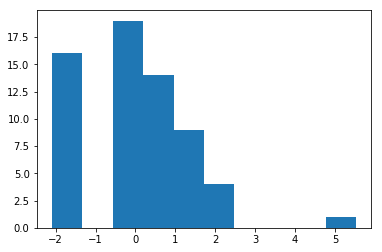

In [118]:
X.dairy[X.dairy == 0] = 0.0000001
lamb=stats.boxcox_normmax(X.dairy, brack=(-1.9, 1.9))
print("Lambda:", lamb)
y_da=(np.power(X.dairy,0.476755)-1)/0.476755
plt.hist(y_da);

/Users/brittb28/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


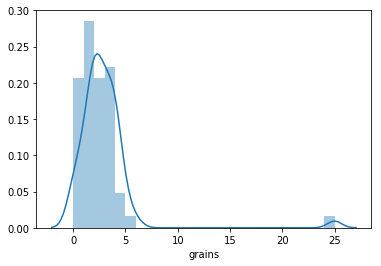

In [119]:
sns.distplot(X.grains)

Lambda: 0.4362692066450301


/Users/brittb28/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


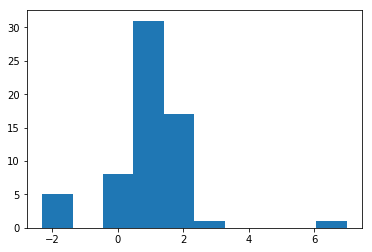

In [120]:
X.grains[X.grains == 0] = 0.0000001
lamb=stats.boxcox_normmax(X.grains, brack=(-1.9, 1.9))
print("Lambda:", lamb)
y_gr=(np.power(X.grains,0.43269)-1)/0.43269
plt.hist(y_gr);

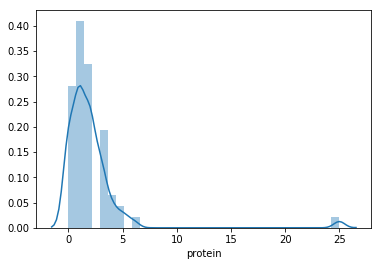

In [121]:
sns.distplot(X['protein'])

Lambda: 0.39889108974419135


/Users/brittb28/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


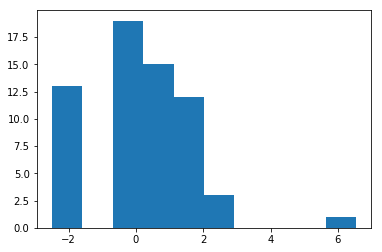

In [122]:
X.protein[X.protein == 0] = 0.0000001
lamb=stats.boxcox_normmax(X.protein, brack=(-1.9, 1.9))
print("Lambda:", lamb)
y_pr=(np.power(X.protein,0.39889)-1)/0.39889
plt.hist(y_pr);

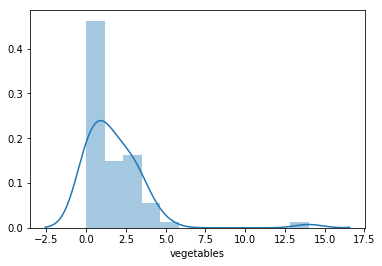

In [123]:
sns.distplot(X['vegetables'])

/Users/brittb28/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Lambda: 0.5057393226842314


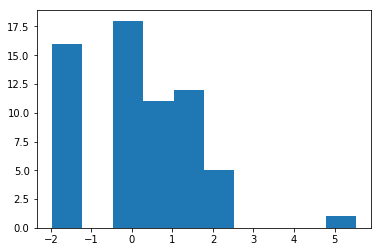

In [124]:
X.vegetables[X.vegetables == 0] = 0.0000001
lamb=stats.boxcox_normmax(X.vegetables, brack=(-1.9, 1.9))
print("Lambda:", lamb)
y_veg=(np.power(X.vegetables,0.505739)-1)/0.505739
plt.hist(y_veg);

In [125]:
# Casting transformations back to features
X['dairy'] = y_da
X['grains'] = y_gr
X['protein'] = y_pr
X['vegetables'] = y_veg

In [127]:
X.head()

,dairy,extra,fruits,grains,protein,vegetables
country,,,,,,
Algeria,0.821407,7,5,1.899326,0.000000,1.469149
Argentina,0.821407,6,2,0.808311,0.798448,0.000000
Armenia,0.000000,3,0,1.406529,-2.502912,0.000000
Australia,-2.096549,13,3,1.406529,0.798448,0.000000
Austria,0.000000,6,1,0.000000,0.000000,-1.976734


In [128]:
kf = KFold(n_splits=5, random_state=42, shuffle=True)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train, y_test = y[train_index], y[test_index]

In [129]:
linreg_model = LinearRegression()
linreg_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [130]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

height_model = sm.OLS(y_train, sm.add_constant(scaler.fit_transform(X_train)))

results = height_model.fit()

# summarize our model
results.summary()

/Users/brittb28/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/brittb28/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   mean   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     3.867
Date:                Thu, 10 Oct 2019   Prob (F-statistic):            0.00348
Time:                        12:04:21   Log-Likelihood:                -146.99
No. Observations:                  51   AIC:                             308.0
Df Residuals:                      44   BIC:                             321.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        173.2214      0.651    265.964      0.000     171.909     174.534
x1             0.9312      0.814      1.144      0.259      -0.709       2.571
x2             3.5758      1.133      3.155      0.003       1.292       5.860
x3            -3.8920      1.170     -3.327      0.002      -6.249      -1.535
x4             0.1738      0.932      0.187      0.853      -1.704       2.052
x5            -0.0341      0.850     -0.040      0.968      -1.748       1.680
x6            -0.6223      0.903     -0.689      0.494      -2.442       1.197
==============================================================================
Omnibus:                        0.670   Durbin-Watson:                   1.626
Prob(Omnibus):                  0.715   Jarque-Bera (JB):                0.772
Skew:                          -0.161   Prob(JB):                        0.680
Kurtosis:                       2.490   Cond. No.                         3.93
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Round 6: Transforming extra and fruit

/Users/brittb28/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


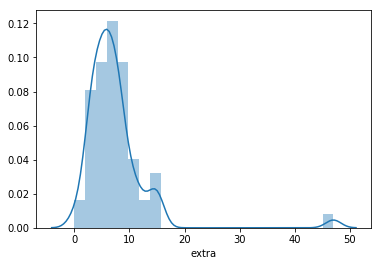

In [131]:
sns.distplot(X['extra'])

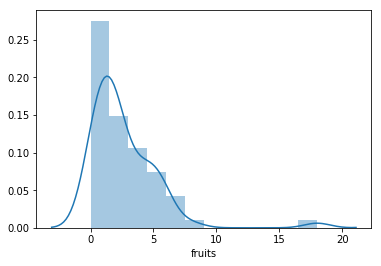

In [132]:
sns.distplot(X['fruits'])

Lambda: 0.4860941041413602


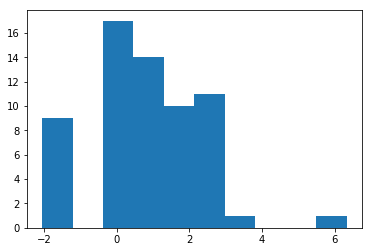

In [135]:
X.fruits[X.fruits == 0] = 0.0000001
lamb=stats.boxcox_normmax(X.fruits, brack=(-1.9, 1.9))
print("Lambda:", lamb)
y_fru=(np.power(X.fruits,0.48609)-1)/0.48609
plt.hist(y_fru);

Lambda: 0.396830495811357


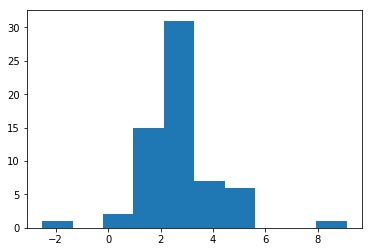

In [137]:
X.extra[X.extra == 0] = 0.0000001
lamb=stats.boxcox_normmax(X.extra, brack=(-1.9, 1.9))
print("Lambda:", lamb)
y_xt=(np.power(X.extra,0.39683)-1)/0.39683
plt.hist(y_xt);

In [138]:
X['fruits'] = y_fru
X['extra'] = y_xt

In [140]:
scaler = StandardScaler()

height_model = sm.OLS(y_train, sm.add_constant(scaler.fit_transform(X_train)))

results = height_model.fit()

# summarize our model
results.summary()

/Users/brittb28/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/brittb28/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   mean   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     3.867
Date:                Thu, 10 Oct 2019   Prob (F-statistic):            0.00348
Time:                        12:09:27   Log-Likelihood:                -146.99
No. Observations:                  51   AIC:                             308.0
Df Residuals:                      44   BIC:                             321.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        173.2214      0.651    265.964      0.000     171.909     174.534
x1             0.9312      0.814      1.144      0.259      -0.709       2.571
x2             3.5758      1.133      3.155      0.003       1.292       5.860
x3            -3.8920      1.170     -3.327      0.002      -6.249      -1.535
x4             0.1738      0.932      0.187      0.853      -1.704       2.052
x5            -0.0341      0.850     -0.040      0.968      -1.748       1.680
x6            -0.6223      0.903     -0.689      0.494      -2.442       1.197
==============================================================================
Omnibus:                        0.670   Durbin-Watson:                   1.626
Prob(Omnibus):                  0.715   Jarque-Bera (JB):                0.772
Skew:                          -0.161   Prob(JB):                        0.680
Kurtosis:                       2.490   Cond. No.                         3.93
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Round 7: Getting more data

Ok so I scraped ~ 6000 recipes from all_recipes which really helped to fill out some countries, but not others

In [141]:
with open('data/final_df_men.pickle','rb') as read_file:
    final_df_men = pickle.load(read_file)

In [174]:
X = final_df_men.drop('mean', axis = 1)
y = final_df_men['mean']

In [176]:
cols = list(X)

In [177]:
for i in cols:
    X[i][X[i] == 0] = 0.0000001

In [178]:
from sklearn.preprocessing import power_transform

In [179]:
X = power_transform(X, method='box-cox', standardize=False, copy=False)

In [183]:
X = pd.DataFrame({'dairy':X[:,0], 'extra':X[:,1], 'fruits':X[:,2], 'grains':X[:,3],
                  'protein':X[:,4], 'vegetables':X[:,5]})

In [185]:
kf = KFold(n_splits=5, random_state=42, shuffle=True)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train, y_test = y[train_index], y[test_index]

In [186]:
linreg_model = LinearRegression()
linreg_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [187]:
scaler = StandardScaler()

height_model = sm.OLS(y_train, sm.add_constant(scaler.fit_transform(X_train)))

results = height_model.fit()

# summarize our model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   mean   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     1.749
Date:                Thu, 10 Oct 2019   Prob (F-statistic):              0.131
Time:                        19:50:30   Log-Likelihood:                -159.75
No. Observations:                  53   AIC:                             333.5
Df Residuals:                      46   BIC:                             347.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        172.2416      0.727    236.974      0.000     170.779     173.705
x1             2.2963      1.206      1.905      0.063      -0.130       4.723
x2             1.0112      1.585      0.638      0.527      -2.179       4.201
x3            -2.1917      1.441     -1.521      0.135      -5.093       0.709
x4            -0.8442      1.264     -0.668      0.507      -3.388       1.700
x5            -0.7715      1.228     -0.628      0.533      -3.243       1.700
x6            -0.4383      1.150     -0.381      0.705      -2.754       1.877
==============================================================================
Omnibus:                        9.171   Durbin-Watson:                   2.255
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                2.753
Skew:                          -0.033   Prob(JB):                        0.252
Kurtosis:                       1.885   Cond. No.                         5.21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Welp. Let's check out the women's group**

In [190]:
with open('data/final_df_women.pickle','rb') as read_file:
    final_df_women = pickle.load(read_file)

In [191]:
X = final_df_women.drop('mean', axis = 1)
y = final_df_women['mean']

In [192]:
cols = list(X)
for i in cols:
    X[i][X[i] == 0] = 0.0000001
X = power_transform(X, method='box-cox', standardize=False, copy=False)
X = pd.DataFrame({'dairy':X[:,0], 'extra':X[:,1], 'fruits':X[:,2], 'grains':X[:,3],
                  'protein':X[:,4], 'vegetables':X[:,5]})

In [185]:
kf = KFold(n_splits=5, random_state=42, shuffle=True)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train, y_test = y[train_index], y[test_index]

In [186]:
linreg_model = LinearRegression()
linreg_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [187]:
scaler = StandardScaler()

height_model = sm.OLS(y_train, sm.add_constant(scaler.fit_transform(X_train)))

results = height_model.fit()

# summarize our model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   mean   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     1.749
Date:                Thu, 10 Oct 2019   Prob (F-statistic):              0.131
Time:                        19:50:30   Log-Likelihood:                -159.75
No. Observations:                  53   AIC:                             333.5
Df Residuals:                      46   BIC:                             347.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        172.2416      0.727    236.974      0.000     170.779     173.705
x1             2.2963      1.206      1.905      0.063      -0.130       4.723
x2             1.0112      1.585      0.638      0.527      -2.179       4.201
x3            -2.1917      1.441     -1.521      0.135      -5.093       0.709
x4            -0.8442      1.264     -0.668      0.507      -3.388       1.700
x5            -0.7715      1.228     -0.628      0.533      -3.243       1.700
x6            -0.4383      1.150     -0.381      0.705      -2.754       1.877
==============================================================================
Omnibus:                        9.171   Durbin-Watson:                   2.255
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                2.753
Skew:                          -0.033   Prob(JB):                        0.252
Kurtosis:                       1.885   Cond. No.                         5.21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Welp. Let's check out the women's group**

In [190]:
with open('data/final_df_women.pickle','rb') as read_file:
    final_df_women = pickle.load(read_file)

In [191]:
X = final_df_women.drop('mean', axis = 1)
y = final_df_women['mean']

In [193]:
kf = KFold(n_splits=5, random_state=42, shuffle=True)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train, y_test = y[train_index], y[test_index]

In [194]:
linreg_model = LinearRegression()
linreg_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [195]:
scaler = StandardScaler()

height_model = sm.OLS(y_train, sm.add_constant(scaler.fit_transform(X_train)))

results = height_model.fit()

# summarize our model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   mean   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     1.532
Date:                Thu, 10 Oct 2019   Prob (F-statistic):              0.189
Time:                        19:55:47   Log-Likelihood:                -150.56
No. Observations:                  53   AIC:                             315.1
Df Residuals:                      46   BIC:                             328.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        159.8292      0.611    261.523      0.000     158.599     161.059
x1             1.5637      1.014      1.543      0.130      -0.477       3.604
x2             0.4660      1.333      0.350      0.728      -2.216       3.149
x3            -1.7541      1.212     -1.448      0.155      -4.193       0.685
x4            -0.3898      1.063     -0.367      0.715      -2.529       1.749
x5            -0.2448      1.032     -0.237      0.814      -2.323       1.833
x6            -0.6918      0.967     -0.715      0.478      -2.639       1.255
==============================================================================
Omnibus:                        2.644   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.267   Jarque-Bera (JB):                1.931
Skew:                          -0.289   Prob(JB):                        0.381
Kurtosis:                       2.264   Cond. No.                         5.21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [198]:
from sklearn.model_selection import cross_val_score
lm = LinearRegression()

cross_val_score(lm, X, y, # estimator, features, target
                cv=5, # number of folds 
                scoring='r2') # scoring metric

array([-0.6648256 ,  0.31886066, -0.18735213,  0.0143028 , -0.27207404])

In [203]:
X.head()

,dairy,extra,fruits,grains,protein,vegetables
0,0.724835,2.147921,1.832954,1.531983,0.000000,1.177895
1,0.724835,1.962128,0.732591,0.728366,0.728425,0.000000
2,0.000000,1.161166,-5.826188,1.188836,-6.325860,0.000000
3,4.502700,6.424310,4.616534,4.969505,3.201886,2.203906
4,0.000000,1.962128,0.000000,0.000000,0.000000,-6.917409


In [210]:
from sklearn.linear_model import Ridge

In [211]:
#run the CV

kf = KFold(n_splits=5, shuffle=True, random_state = 71)
cv_lm_r2s, cv_lm_reg_r2s = [], [] #collect the validation results for both models

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X.iloc[train_ind,:], y[train_ind]
    X_val, y_val = X.iloc[val_ind,:], y[val_ind] 
    
    #simple linear regression
    lm = LinearRegression()
    lm_reg = Ridge(alpha=1)

    lm.fit(X_train, y_train)
    cv_lm_r2s.append(lm.score(X_val, y_val))
    
    #ridge with feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    lm_reg.fit(X_train_scaled, y_train)
    cv_lm_reg_r2s.append(lm_reg.score(X_val_scaled, y_val))

print('Simple regression scores: ', cv_lm_r2s)
print('Ridge scores: ', cv_lm_reg_r2s, '\n')

print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')
print(f'Ridge mean cv r^2: {np.mean(cv_lm_reg_r2s):.3f} +- {np.std(cv_lm_reg_r2s):.3f}')

Simple regression scores:  [-0.10653460209500043, -0.004678944253500461, 0.12185739749776581, -0.5516861334626633, 0.03419174218891352]
Ridge scores:  [-0.08268342484166213, -0.00482962426215261, 0.12619378200993936, -0.43124128342258317, 0.037245132301842565] 

Simple mean cv r^2: -0.101 +- 0.237
Ridge mean cv r^2: -0.071 +- 0.192


In [213]:
from sklearn.preprocessing import PolynomialFeatures

In [214]:
#set up the 3 models we're choosing from:

lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=1)

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

In [215]:
#validate

lm.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')

Linear Regression val R^2: 0.034
Ridge Regression val R^2: 0.037
Degree 2 polynomial regression val R^2: -27.554


In [229]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [221]:
final_df_men.head()

,dairy,extra,fruits,grains,protein,vegetables,mean
country,,,,,,,
algeria,2.0,7.0,5.0,4.0,1.0,3.0,170.071800
argentina,2.0,6.0,2.0,2.0,2.0,1.0,174.615725
armenia,1.0,3.0,0.0,3.0,0.0,1.0,171.996646
australia,35.0,143.0,32.0,43.0,14.0,7.0,179.204648
austria,1.0,6.0,1.0,1.0,1.0,0.0,177.407705


In [222]:
scaler = StandardScaler()

In [223]:
final_df_men['predict']= linreg_model.predict(scaler.fit_transform(X))
final_df_men['resid']=final_df_men['mean']-final_df_men['predict']

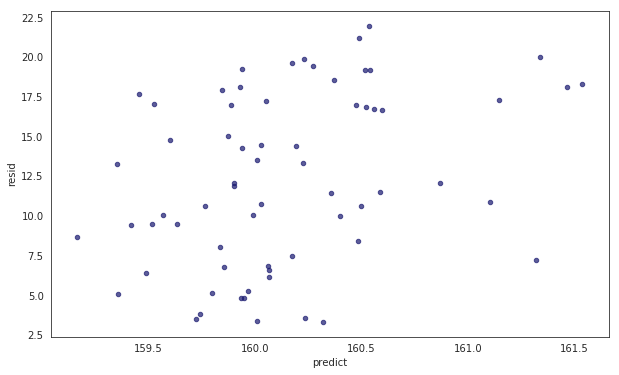

In [237]:
with sns.axes_style('white'):
    plot=final_df_men.plot(kind='scatter',
                  x='predict',y='resid',alpha=0.7,figsize=(10,6), color =  'midnightblue')

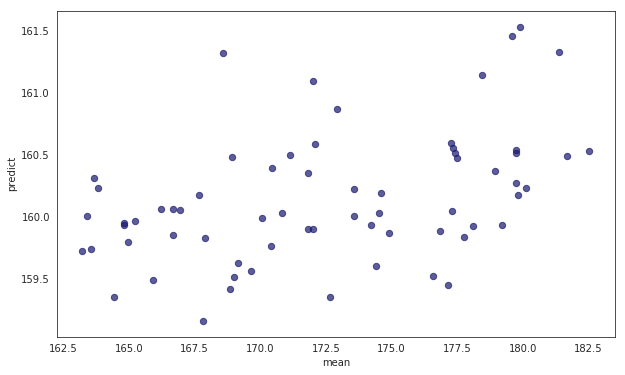

In [248]:
with sns.axes_style('white'):
    plot=final_df_men.plot(kind='scatter',
                  x='mean',y='predict',alpha =0.7,figsize=(10,6), color =  'midnightblue', s=40)

/Users/brittb28/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


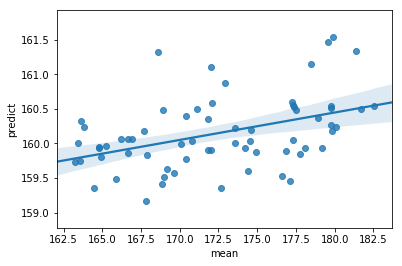

In [250]:
sns.regplot(x="mean", y="predict", data=final_df_men), color = ;

In [227]:
print(mean_squared_error(final_df_men['mean'], final_df_men['predict'])) 

181.06866312095417


In [230]:
print(mean_absolute_error(final_df_men['mean'], final_df_men['predict']))

12.334729355891326


In [ ]:
final_df_women['predict']= linreg_model.predict(scaler.fit_transform(X))
final_df_women['resid']=final_df_women['mean']-final_df_women['predict']

In [259]:
sns.regplot(x="mean", y="predict", data=final_df_women)

KeyError: 'predict'

## Round ?: Going to try dropping another column

In [355]:
X = final_df_men.drop(['mean','extra'], axis = 1)
y = final_df_men['mean']

In [356]:
cols = list(X)
for i in cols:
    X[i][X[i] == 0] = 0.0000001
X = power_transform(X, method='box-cox', standardize=False, copy=False)
X = pd.DataFrame({'dairy':X[:,0], 'fruits':X[:,1], 'grains':X[:,2],
                  'protein':X[:,3], 'vegetables':X[:,4]})

In [357]:
#run the CV

kf = KFold(n_splits=5, shuffle=True, random_state = 71)
cv_lm_r2s, cv_lm_reg_r2s = [], [] #collect the validation results for both models

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X.iloc[train_ind,:], y[train_ind]
    X_val, y_val = X.iloc[val_ind,:], y[val_ind] 
    
    #simple linear regression
    lm = LinearRegression()
    lm_reg = Ridge(alpha=1)

    lm.fit(X_train, y_train)
    cv_lm_r2s.append(lm.score(X_val, y_val))
    
    #ridge with feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    lm_reg.fit(X_train_scaled, y_train)
    cv_lm_reg_r2s.append(lm_reg.score(X_val_scaled, y_val))

print('Simple regression scores: ', cv_lm_r2s)
print('Ridge scores: ', cv_lm_reg_r2s, '\n')

print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')
print(f'Ridge mean cv r^2: {np.mean(cv_lm_reg_r2s):.3f} +- {np.std(cv_lm_reg_r2s):.3f}')

Simple regression scores:  [-0.22902518575793843, -0.2035516490682141, 0.1649997100814934, -0.18325087813770358, 0.17164346641402273]
Ridge scores:  [-0.19717461188909646, -0.1992867401115348, 0.1769840668682785, -0.17982375334703526, 0.1647763125354229] 

Simple mean cv r^2: -0.056 +- 0.184
Ridge mean cv r^2: -0.047 +- 0.178


In [358]:
from sklearn.preprocessing import PolynomialFeatures

In [359]:
#set up the 3 models we're choosing from:

lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=1)

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

In [360]:
#validate

lm.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')

Linear Regression val R^2: 0.172
Ridge Regression val R^2: 0.165
Degree 2 polynomial regression val R^2: -4.096


In [361]:
final_df_men['predict']= lm_reg.predict(scaler.fit_transform(X))
final_df_men['resid']=final_df_men['mean']-final_df_men['predict']

/Users/brittb28/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


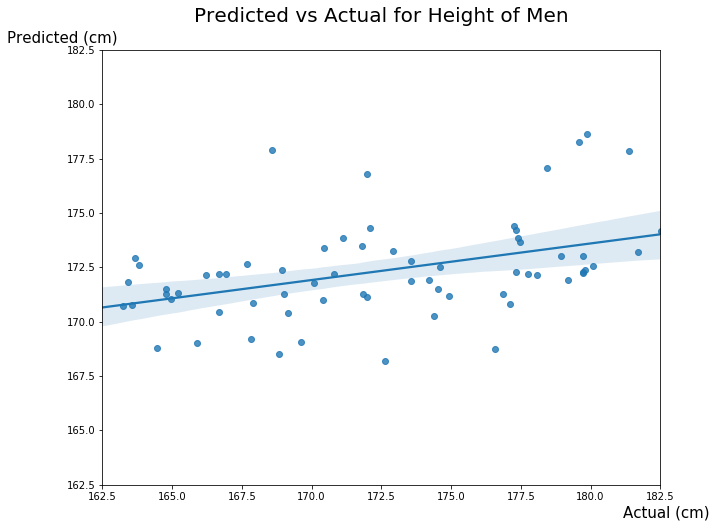

In [362]:
plt.figure(figsize = [10,8])
sns.regplot(x="mean", y="predict", data=final_df_men)
plt.title('Predicted vs Actual for Height of Men', size = 20, y = 1.05)
plt.xlabel('Actual (cm)', size = 15, x = 1.01)
plt.ylabel('Predicted (cm)', size = 15, rotation = 0, y = 1.01)
plt.xlim(162.5,182.5)
plt.ylim(162.5,182.5)
plt.show()

In [325]:
print(mean_squared_error(final_df_men['mean'], final_df_men['predict'])) 

25.238025803376942


In [326]:
print(mean_absolute_error(final_df_men['mean'], final_df_men['predict']))

4.275187438829854


In [328]:
scaler = StandardScaler()

height_model = sm.OLS(y, sm.add_constant(scaler.fit_transform(X)))

results = height_model.fit()

# summarize our model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   mean   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     2.971
Date:                Fri, 11 Oct 2019   Prob (F-statistic):             0.0184
Time:                        00:08:23   Log-Likelihood:                -199.80
No. Observations:                  66   AIC:                             411.6
Df Residuals:                      60   BIC:                             424.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        172.4830      0.645    267.494      0.000     171.193     173.773
x1             2.1006      1.026      2.046      0.045       0.047       4.154
x2             1.0834      1.354      0.800      0.427      -1.625       3.792
x3            -3.0090      1.116     -2.696      0.009      -5.242      -0.776
x4            -0.9173      1.094     -0.839      0.405      -3.106       1.271
x5             0.0038      1.043      0.004      0.997      -2.083       2.091
==============================================================================
Omnibus:                        9.829   Durbin-Watson:                   2.127
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                3.366
Skew:                          -0.186   Prob(JB):                        0.186
Kurtosis:                       1.958   Cond. No.                         4.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/Users/brittb28/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


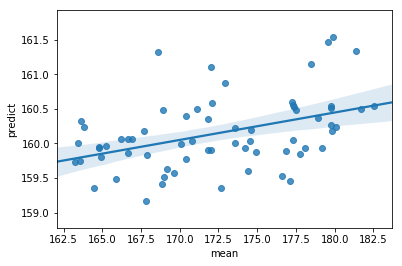

In [265]:
sns.regplot(x="mean", y="predict", data=final_df_men)

In [281]:
X = final_df_women.drop(['extra', 'mean', 'resid', 'predict'], axis = 1)
y = final_df_women['mean']

In [282]:
cols = list(X)
for i in cols:
    X[i][X[i] == 0] = 0.0000001
X = power_transform(X, method='box-cox', standardize=False, copy=False)
X = pd.DataFrame({'dairy':X[:,0], 'fruits':X[:,1], 'grains':X[:,2],
                  'protein':X[:,3], 'vegetables':X[:,4]})

In [277]:
print(mean_squared_error(final_df_women['mean'], final_df_women['predict'])) 

20.69947843026074


In [278]:
print(mean_absolute_error(final_df_women['mean'], final_df_women['predict']))

3.8870466988457277


In [283]:
#run the CV

kf = KFold(n_splits=5, shuffle=True, random_state = 71)
cv_lm_r2s, cv_lm_reg_r2s = [], [] #collect the validation results for both models

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X.iloc[train_ind,:], y[train_ind]
    X_val, y_val = X.iloc[val_ind,:], y[val_ind] 
    
    #simple linear regression
    lm = LinearRegression()
    lm_reg = Ridge(alpha=1)

    lm.fit(X_train, y_train)
    cv_lm_r2s.append(lm.score(X_val, y_val))
    
    #ridge with feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    lm_reg.fit(X_train_scaled, y_train)
    cv_lm_reg_r2s.append(lm_reg.score(X_val_scaled, y_val))

print('Simple regression scores: ', cv_lm_r2s)
print('Ridge scores: ', cv_lm_reg_r2s, '\n')

print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')
print(f'Ridge mean cv r^2: {np.mean(cv_lm_reg_r2s):.3f} +- {np.std(cv_lm_reg_r2s):.3f}')

Simple regression scores:  [-0.11485112528771313, -0.02030291175366794, 0.11356231333313983, -0.1950254828475637, 0.017890866416211515]
Ridge scores:  [-0.08926551860881582, -0.01947374395203516, 0.11773128143169775, -0.19394705959274838, 0.021041805816292003] 

Simple mean cv r^2: -0.040 +- 0.107
Ridge mean cv r^2: -0.033 +- 0.105


In [284]:
#set up the 3 models we're choosing from:

lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=1)

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

In [285]:
#validate

lm.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')

Linear Regression val R^2: 0.018
Ridge Regression val R^2: 0.021
Degree 2 polynomial regression val R^2: -4.952


In [286]:
final_df_women['predict']= lm_reg.predict(scaler.fit_transform(X))
final_df_women['resid']=final_df_women['mean']-final_df_women['predict']

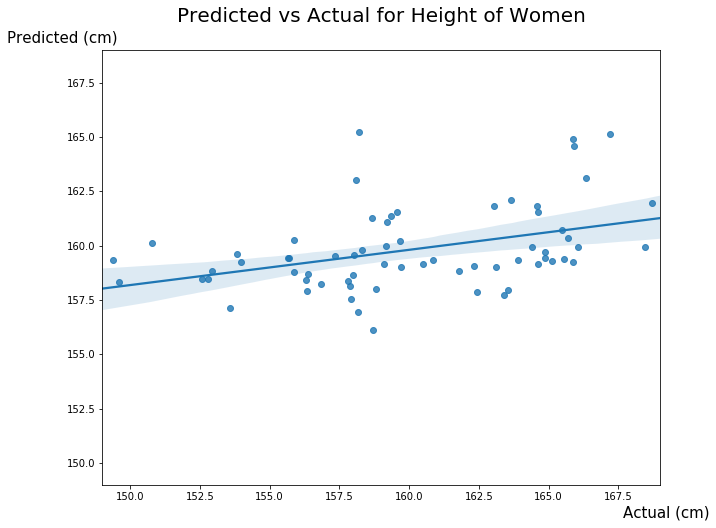

In [351]:
plt.figure(figsize = [10,8])
sns.regplot(x="mean", y="predict", data=final_df_women)
plt.title('Predicted vs Actual for Height of Women', size = 20, y = 1.05)
plt.xlabel('Actual (cm)', size = 15, x = 1.01)
plt.ylabel('Predicted (cm)', size = 15, rotation = 0, y = 1.01)
plt.xlim(149,169)
plt.ylim(149,169)
plt.show()

In [333]:
final_df_men

,dairy,extra,fruits,grains,protein,vegetables,mean
country,,,,,,,
algeria,2.0,7.0,5.0,4.0,1.0,3.0,170.071800
argentina,2.0,6.0,2.0,2.0,2.0,1.0,174.615725
armenia,1.0,3.0,0.0,3.0,0.0,1.0,171.996646
australia,35.0,143.0,32.0,43.0,14.0,7.0,179.204648
austria,1.0,6.0,1.0,1.0,1.0,0.0,177.407705
bangladesh,3.0,35.0,2.0,6.0,4.0,3.0,163.808228
belgium,0.0,2.0,0.0,1.0,0.0,1.0,181.698803
brazil,3.0,8.0,6.0,4.0,2.0,2.0,173.551211
cameroon,0.0,0.0,1.0,2.0,1.0,1.0,167.823191


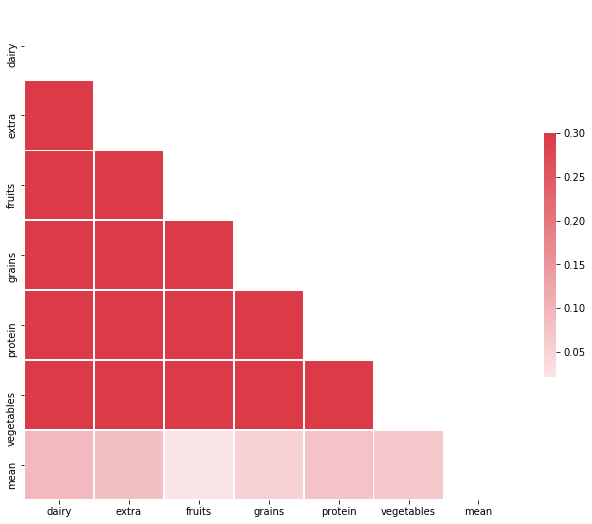

In [335]:

corr = final_df_men.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

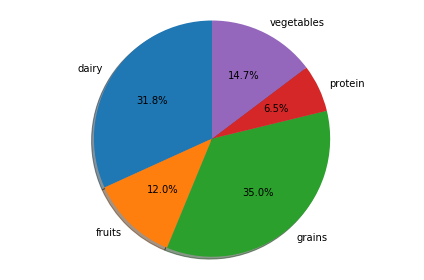

In [346]:
final_plot = final_df_men.drop(['mean','extra'], axis = 1)
labels = final_plot.columns
sizes = final_plot.loc['mexico',:]
# only "explode" the 2nd slice (i.e. 'Hogs')
#explode = (0, 0.1, 0, 0)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()